# Data Intelligence -  BBDAINT1KU
|Student C|ccc@itu.dk|25-05-2021|
|-----------|-----------|-----------|

## Introduction
In this paper, I will conduct a data analysis on a dataset provided with the exam. The dataset contains data about short-term rentals in New York. Throughout the paper, I will aim to answer the following question:
**What are the best predictors of the rental price included in the dataset?**

Data is a very strategic asset (Provost et. al., 2013) that can be utilized in business to gain useful insights that can serve as a baseline for organizational decision-making (ibid.). Understanding the predictors can be a useful information in regards to business, for example creating a model to predict price category an apartment should be in. This can be for example used for dynamic pricing of the rentals or provide suggestions in pricing to hosts.

Throughout this paper, I will also try to visualize data as "human brains are wired for seeing patterns and differences, and for understanding spatial relationships from this." (Grant, 1974; p.4) This will facilitate better understanding of the dataset.




## Prerequisites (libraries/packages)
In order to use objects and functions made for data analysis, I will import the following libraries and use industry standard abbreviations:

####**pandas**
library that accomodates handling and analyzing large amounts of rectangular data

####**numpy**
library that includes handling of numerical data, I especially use it to leverage the functionality of np.NaN

####**matplotlib**
library that allows visualization of data, works well with pandas and numpy

####**seaborn**
library that allows for simpler (e.g. regplot method) data visualization with nicer grapics

####**sci-kit learn (sklearn)**
library that includes model objects, that I will leverage for the analysis


In [1]:
!pip install -U pandas scikit-learn matplotlib scipy delayed

Requirement already up-to-date: pandas in /usr/local/lib/python3.7/dist-packages (1.2.4)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.7/dist-packages (3.4.2)
Requirement already up-to-date: scipy in /usr/local/lib/python3.7/dist-packages (1.6.3)
Requirement already up-to-date: delayed in /usr/local/lib/python3.7/dist-packages (0.11.0b1)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.linear_model
import sklearn.ensemble
import sklearn.metrics

## Data loading and description
In this section, I will load the data and get a basic grasp of what does the data set include.

In [3]:
#check whether the file is located at the correct place and 
#is accessible, also provides an idea what to expect in terms of columns
!head -n10 rentals.csv

id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.9419,Private room,150,3,0,,,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.975,Entire home/apt,200,3,74,201

In [4]:
def load_data(path):
    # using pandas built-in method to read a csv file into a data frame
    return pd.read_csv(path)

df = load_data("rentals.csv")

Now that I have loaded the dataset succesfully into the dataframe, I can start using pandas built-in methods to get a grasp of the data:

In [5]:
#shows information about columns: id, name of the column, amount of non-null values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
#shows first five datapoints in the data frame
df.head()

id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365
3  3831  ...              194
4  5022  ...                0

[5 rows x 16 columns]

In [7]:
#describes various metrics of each numerical column in the dataframe
df.describe()

id  ...  availability_365
count  4.889500e+04  ...      48895.000000
mean   1.901714e+07  ...        112.781327
std    1.098311e+07  ...        131.622289
min    2.539000e+03  ...          0.000000
25%    9.471945e+06  ...          0.000000
50%    1.967728e+07  ...         45.000000
75%    2.915218e+07  ...        227.000000
max    3.648724e+07  ...        365.000000

[8 rows x 10 columns]

Looking at column names provided by pandas info method, we can see there are 15 columns for each data point and in total there are 48895 data rows. I assume the dataset was created by either scraping or exporting a database of a short-term rental website such as AirBnB focused on the New York area.



**0.id** contains data about:

based on my assumption a unique identifier of the rental listing

type: int64

I will not use this for analysis since it is a unique identifier and does not represent valuable data in my case

**1.name** contains data about:

name (title) of the rented propenty

type: object

I will not use the name for my analysis since I believe it should not have an influence on the price

**2.host_id** contains data about:

based on my assumption a unique identifier of the host

type: int64

I do not consider the data relating to the host_id relevant to the analysis due to similar reason as the previous data points


**3.host_name** contains data about:

name of the host

type: object

I will not use this data in my analysis since I do not consider it relevant


**4.neighbourhood_group** contains data about:

what New York borough is the rental in

type: object

I will use this column, but before using it I will have to create label encodings in order to fit it in my model.

**5.neighbourhood** contains data about:

what neighbourghood is the rental in

type: object

Categorical feature - however with way too many unique values, which I believe could decrease the accuracy of the model, I will not use this column in my analysis

**6.latitude, 7.longitude** contain data about:

coordinates of the rentals

type: float64

I will use these columns to plot the data points on a map and get a better understanding of the data.

**8.room_type** contains data about:

type of the rental - whether it is a full apartment or a private room (all possible values will be explored further in the next section)

type: object

Categorical feature - I will need to pre-process my data with some label encoding in order to fit it in my model

**9.price** contains data about:

price of the rental

type: int64

Contains data about price of the rentals, I will convert this column into a new column called price_range, which I will make into a categorical feature.


**10.minimum_nights** contains data about:

The minimum amount of nights the apartment must be rented*

type: int64

Since this data is numerical and I assume it could potentially influence the price, I will use this column in my analysis to explore the relationship.

**11.number_of_reviews** contains data about:

the number of reviews placed for this apartment*

type: int64

I will use this column since I believe the amount of reviews can influence the price, therefore I will explore the relationship of this variable on price.

**12.last_review** contains data about:

date of last review

type: object

I will not use this in my analysis, I can also see at inspecting the df.info() that there are over 10k+ missing lines.

**13.reviews_per_month** contains data about:

the number of reviews this apartment recieves per month

type: float64

I will use this in my analysis since I believe it can influence the price.

**14.calculated_host_listings_count** contains data about:

how many apartments this host rents out*

type: int64

Owning many listings can result in a more professional and reliable approach, which could potentially be reflected in the price. I will explore the relationship of this column on the price.

**15.availability_365** contains data about:

how many of the 365 days of the year this apartment is available for*

type: int64

I will explore the relationship of availability with price as I believe availability has an influence on the price.


\* description of this column was provided with the dataset


In [8]:
#provides amount of null values within each column
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Hypothesis
I believe some parts of this data can allow me to get an understanding what is determining the price of the rental. A model that would dynamically change the price of the listing could then be built or refined based on the most relevant variables. 

I assume based on my previous travels that the 4. neighbourhood_group and 8. room_type are the most determining on the price:


In [9]:
#provides mean prices for particular neighbourghood_group and room_type
df.groupby(["neighbourhood_group","room_type"]).mean()["price"]

neighbourhood_group  room_type      
Bronx                Entire home/apt    127.506596
                     Private room        66.788344
                     Shared room         59.800000
Brooklyn             Entire home/apt    178.327545
                     Private room        76.500099
                     Shared room         50.527845
Manhattan            Entire home/apt    249.239109
                     Private room       116.776622
                     Shared room         88.977083
Queens               Entire home/apt    147.050573
                     Private room        71.762456
                     Shared room         69.020202
Staten Island        Entire home/apt    173.846591
                     Private room        62.292553
                     Shared room         57.444444
Name: price, dtype: float64

<AxesSubplot:xlabel='neighbourhood_group,room_type'>

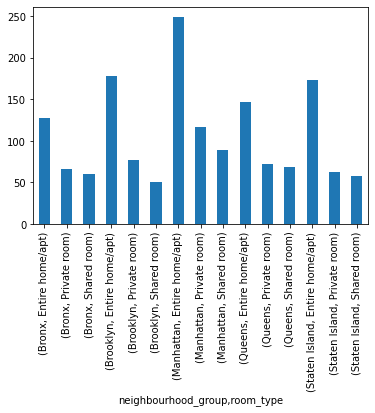

In [10]:
df.groupby(["neighbourhood_group","room_type"]).mean()["price"].plot.bar()

The dataset can then be understood as data about rentals from 5 New York neighbourhoods. Looking at the mean values of the price for individual neighbourhood groups and room_types, I can see that the differences in mean values in each neighbourhood group implicate that room_type might be a good predictor of price. Additionally, I can observe that mean price of renting an Entire home in Manhattan is double than in Bronx, which I expect since Manhattan's known expensive prices for square meters.

###The hypothesis is that the neighbourhood_group (or later also refered to as boroughs) is the best predictor for price followed by the type of the rental (room_type, or later referred to as room_category)
 

##Method
Since neighbourhood_group and room_type are categorical features, I have decided to go with the Random Forest Classifier model. I believe this model will handle the categorical features better than a Linear regression, the other model introduced in the Data Intelligence course. 

I plan to represent the different categories with numbers (also called label encoding), which would not make sense in a linear regression, which works on the basis of numerical correlation between features.

Random forest model is rather used for classification rather than estimating a number from an interval such as price. To handle the accuracy and suitability of the model, I will transform my price into categorical data by splitting the price into price ranges (the exact numbers will be determined in the following preprocessing section).

Based on my understanding of the dataset, I have determined that I can use the following features to explore their influence on price:

neighbourhood_group, room_type, minimum_nights, number_of_reviews, review_per_month, calculated_host_listings_count, availability_365

as these are already numerical or can be easily transformed into numerical data

I have decided to exclude neighbourhood as this column contains a lot of unique values and I believe transforming these categorical values into unique numbers would rather decrease the quality of the model.

Further, I have decided to exclude the date since I don't believe the date of the last review has much influence on the price of the rental.

##Data preprocessing

In this section, I will further explore the data and process it for further use.

In [11]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Using the previous code snippet, I can see the amount of missing values in each column in the dataframe. I conclude that the only relevant column that needs replacing missing values is reviews_per_month.

Additionally, the amount of missing values is the same in reviews_per_month and last_review, so I suspect a possible correlation in the causation of the missing values.

In [12]:
#Before trying to fill the missing data, I would like to get a grasp of the data
#to determine the most suitable approach

#show preview of rows that have missing values in the reviews_per_month column
df[df["reviews_per_month"].isna()].head()

id  ... availability_365
2    3647  ...              365
19   7750  ...              249
26   8700  ...                0
36  11452  ...              365
38  11943  ...              365

[5 rows x 16 columns]

I can see that both missing values in last_review and reviews_per_month are in rows that have no reviews, which would explain the missing values. I will validate my assumption on more data:

In [13]:
df[df["reviews_per_month"].isna()].tail(15)

id  ... availability_365
48880  36481315  ...              365
48881  36481615  ...               15
48882  36482231  ...               31
48883  36482416  ...              364
48884  36482783  ...              341
48885  36482809  ...              353
48886  36483010  ...              176
48887  36483152  ...              365
48888  36484087  ...               31
48889  36484363  ...              163
48890  36484665  ...                9
48891  36485057  ...               36
48892  36485431  ...               27
48893  36485609  ...                2
48894  36487245  ...               23

[15 rows x 16 columns]

I can observe that the missing values are truly indeed for all rows without reviews. I will replace the reviews_per_month with a 0, since that is the correct value:

In [14]:
#fill empty values with 0
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

In [15]:
#validate that there are no missing values in the dataset left
df["reviews_per_month"].isna().sum()

0

In my method, I have explained the need to convert the price into a categorical feature. I will do so by creating price ranges, to which the rentals belong to. To choose the price range, I have decided to go with an inductive method utilizing 25%, 50%, 75% marks from the price column, which will allow me to split the data evenly. I will explore the distribution of the prices in the dataset using a histogram method provided by seaborn:


<AxesSubplot:xlabel='price', ylabel='Count'>

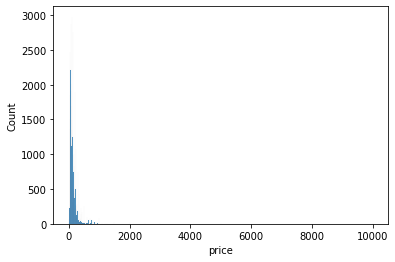

In [16]:
sns.histplot(data=df["price"])

I observe that the graph is unproportional as we can hardly see any valuable information apart from the fact that most of our dataset is priced under or equal to 2000. I will try to see what is the amount of data points with price above 2000 as that could potentially be an outlier, which can potentially decrease the accuracy of our model.

In [17]:
#show information about the subset
df[df["price"] > 2000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 946 to 48304
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              86 non-null     int64  
 1   name                            86 non-null     object 
 2   host_id                         86 non-null     int64  
 3   host_name                       86 non-null     object 
 4   neighbourhood_group             86 non-null     object 
 5   neighbourhood                   86 non-null     object 
 6   latitude                        86 non-null     float64
 7   longitude                       86 non-null     float64
 8   room_type                       86 non-null     object 
 9   price                           86 non-null     int64  
 10  minimum_nights                  86 non-null     int64  
 11  number_of_reviews               86 non-null     int64  
 12  last_review                     3

There are 86 rows of data with prices above 2000 while the whole data set includes 48895. I consider these an outlier and I will thus remove them from the dataset I am working with:

In [18]:
df = df[df["price"] <= 2000]
#validating that the amount of data remaining is correct - the result is 48809 which was expected
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48809 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48809 non-null  int64  
 1   name                            48793 non-null  object 
 2   host_id                         48809 non-null  int64  
 3   host_name                       48788 non-null  object 
 4   neighbourhood_group             48809 non-null  object 
 5   neighbourhood                   48809 non-null  object 
 6   latitude                        48809 non-null  float64
 7   longitude                       48809 non-null  float64
 8   room_type                       48809 non-null  object 
 9   price                           48809 non-null  int64  
 10  minimum_nights                  48809 non-null  int64  
 11  number_of_reviews               48809 non-null  int64  
 12  last_review                     

<AxesSubplot:xlabel='price', ylabel='Count'>

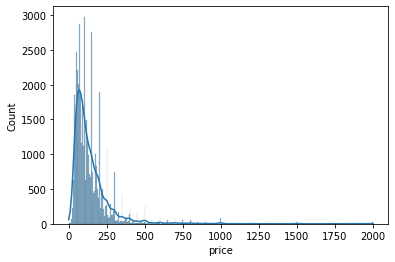

In [19]:
#display along with kernel density estimate curve
sns.histplot(data=df["price"], kde=True)

In [20]:
df["price"].describe()

count    48809.000000
mean       145.499682
std        139.894739
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       2000.000000
Name: price, dtype: float64

I will then use price ranges of 0-68, 69-104, 105-174, 175-2000 to categorize the price. I will create a transform function that I will then use to create a new column in the dataframe called price_range with values from 0 to 3 in respective order:

In [21]:
#converting price to price_range using the map function
def transformPriceToPriceRange(x):
  if x<69:
    return int(0)
  elif x<105:
    return int(1)
  elif x<175:
    return int(2)
  elif x<2001:
    return int(3)
  else:
    return np.nan

df["price_range"] = df["price"].map(transformPriceToPriceRange)

In [22]:
#verify data type is int
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48809 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48809 non-null  int64  
 1   name                            48793 non-null  object 
 2   host_id                         48809 non-null  int64  
 3   host_name                       48788 non-null  object 
 4   neighbourhood_group             48809 non-null  object 
 5   neighbourhood                   48809 non-null  object 
 6   latitude                        48809 non-null  float64
 7   longitude                       48809 non-null  float64
 8   room_type                       48809 non-null  object 
 9   price                           48809 non-null  int64  
 10  minimum_nights                  48809 non-null  int64  
 11  number_of_reviews               48809 non-null  int64  
 12  last_review                     

<AxesSubplot:>

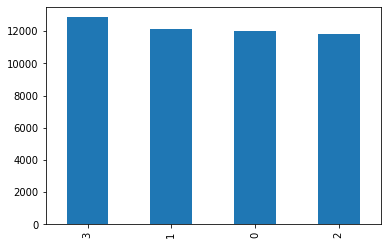

In [23]:
#validate a somehow equal split in price range categories
df["price_range"].value_counts().plot.bar()

Lastly, I have to transform the neighbourhood_group (boroughs) and room_type (room_category) columns into numerical values so then this data can be fitted into the RandomForestClassifier model:

In [64]:
#dictionary with value and number representing it
neighbourhoodDict = {}
for i, x in enumerate(df["neighbourhood_group"].unique()):
  neighbourhoodDict[x] = i

#check dictionary ended up as expected
print(neighbourhoodDict)

def transformNeighbourhoodGroup(x):
  return neighbourhoodDict[x]

df["boroughs"] = df["neighbourhood_group"].map(transformNeighbourhoodGroup)

#I have later realized I could have used the labelEncoder included with pandas

{'Brooklyn': 0, 'Manhattan': 1, 'Queens': 2, 'Staten Island': 3, 'Bronx': 4}


In [25]:
#check result is as expected
df[["neighbourhood_group","boroughs"]].head()

neighbourhood_group  boroughs
0            Brooklyn         0
1           Manhattan         1
2           Manhattan         1
3            Brooklyn         0
4           Manhattan         1

In [26]:
#dictionary with value and number representing it
roomtypeDict = {}
for i, x in enumerate(df["room_type"].unique()):
  roomtypeDict[x] = i

print(roomtypeDict)

def transformRoomType(x):
  return roomtypeDict[x]

df["room_category"] = df["room_type"].map(transformRoomType)

{'Private room': 0, 'Entire home/apt': 1, 'Shared room': 2}


In [27]:
#check result is as expected
df[["room_type","room_category"]].tail()

room_type  room_category
48890     Private room              0
48891     Private room              0
48892  Entire home/apt              1
48893      Shared room              2
48894     Private room              0

## Data exploration

Correlation between individual variables in our dataset:

<AxesSubplot:>

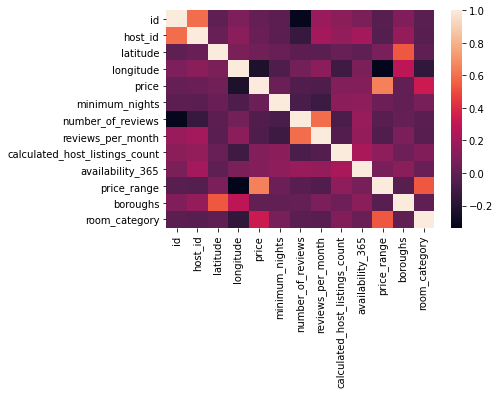

In [28]:
sns.heatmap(df.corr())

We can see there is a high correlation between number of reviews and reviews per month, which does not challenge any of my assumptions. Additionally, we can observe there is not much relevant correlation relevant to my hypothesis apart from a strong room_category and price_range correlation. It will be interesting to explore how good of a predictor room_category is.

The dataset also includes coordinates of the rental place, which I thought I could visualize on a map. A quick google search allowed me to do so:


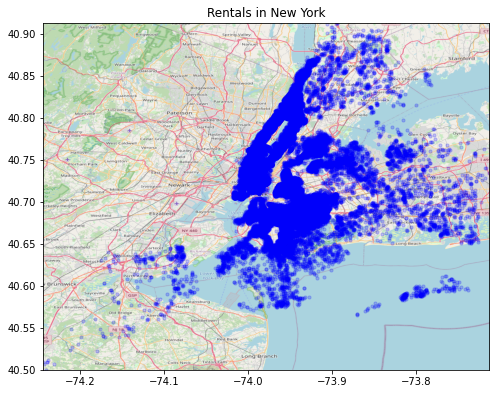

In [29]:
#code from https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db
BBox = [df.longitude.min(), df.longitude.max(),      
         df.latitude.min(), df.latitude.max()]
#map file can be downloaded here: https://drive.google.com/file/d/1Ej-2b7Sqt3C9GjTUbytZclUY1ck9sYDG/view?usp=sharing 
newYork = plt.imread("map.png")
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Rentals in New York')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(newYork, zorder=0, extent = BBox, aspect= 'equal')

I see that these are rentals in New York as expected, spread across 5 regions. Since I am exploring the price, I thought that the color of on the map could represent the price range the rental is in. (Purple stands for price range represented by a 0, yellow stands for the most expensive price range represented by a 4)

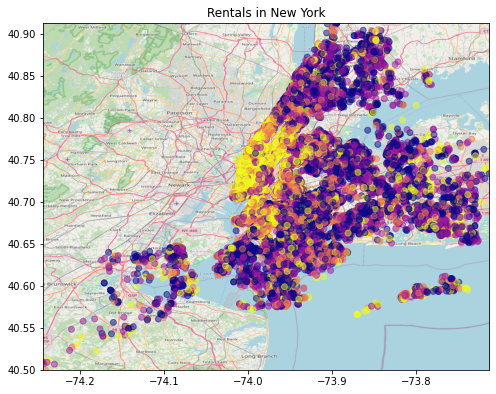

In [30]:
fig, ax = plt.subplots(figsize = (8,7))
#c -> color corresponds to the value in price_range and 
#I have chosen the plasma colormap because personally I believe the contrast captures what I want to show really well
ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 0.5, c=df.price_range,cmap=plt.cm.plasma)
ax.set_title('Rentals in New York')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(newYork, zorder=0, extent = BBox, aspect= 'equal')

This visualization further confirms my expectation that the neighbourhood group is the most relevant predictor of the price since Manhattan seems to be very populated with rentals on the more expensive side of the spectrum. I assume this since Manhattan is known for being one of the most expensive price per square meter in the world.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48809 entries, 0 to 48894
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48809 non-null  int64  
 1   name                            48793 non-null  object 
 2   host_id                         48809 non-null  int64  
 3   host_name                       48788 non-null  object 
 4   neighbourhood_group             48809 non-null  object 
 5   neighbourhood                   48809 non-null  object 
 6   latitude                        48809 non-null  float64
 7   longitude                       48809 non-null  float64
 8   room_type                       48809 non-null  object 
 9   price                           48809 non-null  int64  
 10  minimum_nights                  48809 non-null  int64  
 11  number_of_reviews               48809 non-null  int64  
 12  last_review                     

I will further explore the columns I will use in analysis in order to do pre-processing:

<AxesSubplot:ylabel='Frequency'>

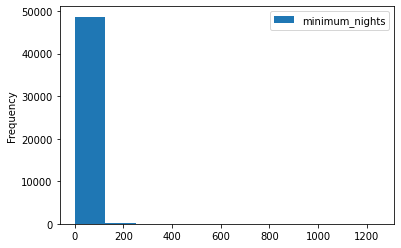

In [32]:
df[["minimum_nights"]].plot.hist()

We can see that this graph doesn't tell us much, which is usually caused by outliers. I will explore the data further to get a better understanding what is in this column:

<AxesSubplot:ylabel='Frequency'>

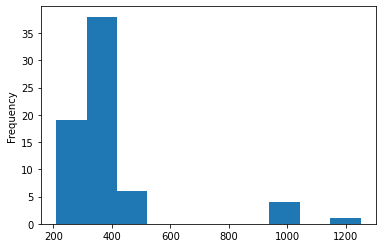

In [33]:
df[df["minimum_nights"] > 200]["minimum_nights"].plot.hist()

I will remove this data since these are outliers (data is scraped/exported from a short-term rental platform, where 365 minimum rented nights does not make much sense).

In [34]:
df = df[df["minimum_nights"] < 200]
#check if column values as expected
df["minimum_nights"].describe()

count    48737.000000
mean         6.437676
std         12.061640
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        198.000000
Name: minimum_nights, dtype: float64

<AxesSubplot:xlabel='number_of_reviews', ylabel='Count'>

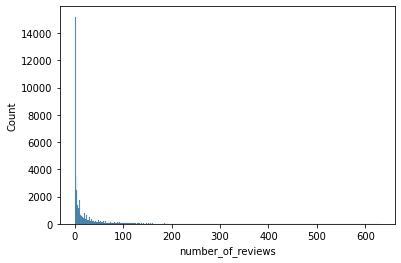

In [35]:
sns.histplot(data=df["number_of_reviews"])

<AxesSubplot:ylabel='Frequency'>

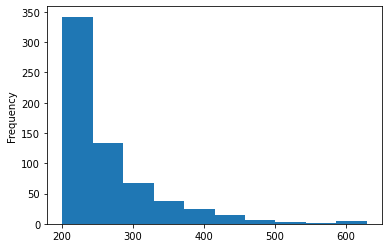

In [36]:
df[df["number_of_reviews"] > 200]["number_of_reviews"].plot.hist()

The end of the histogram (number of reviews over 200) seems like a right end of a normal distribution, so I am not going to treat these data points as outliers and keep it in my dataset. 

<AxesSubplot:ylabel='Frequency'>

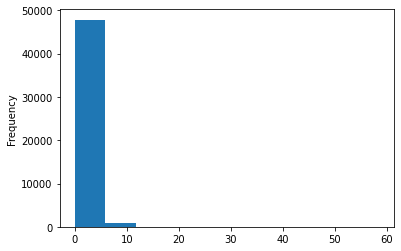

In [37]:
df["reviews_per_month"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

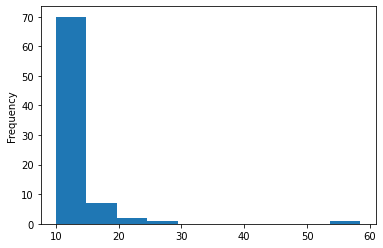

In [38]:
#look at the right side of the data in more detail
df[df["reviews_per_month"]>10]["reviews_per_month"].plot.hist()

In [39]:
#explore potential outlier shown in the figure above (since until 30 reviews per month, it can be considered as the ending of a normal distribution)
df[df["reviews_per_month"]>50]

id  ... room_category
42075  32678719  ...             0

[1 rows x 19 columns]

I can see it is only one data row, which is an outlier due to having 60 reviews per month. Eventhough this might still be a valid data point, outliers can potentially reduce the accuracy of the model, so I will remove it:

In [40]:
#include only rows with less than 50 reviews per month
df = df[df["reviews_per_month"]<50]
#check if as expected
df["reviews_per_month"].describe()

count    48736.000000
mean         1.092289
std          1.577238
min          0.000000
25%          0.040000
50%          0.370000
75%          1.590000
max         27.950000
Name: reviews_per_month, dtype: float64

<AxesSubplot:ylabel='Frequency'>

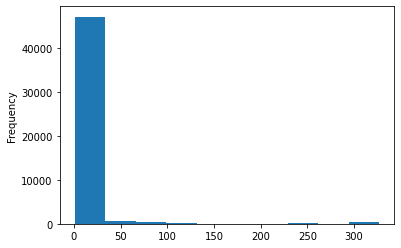

In [41]:
df["calculated_host_listings_count"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

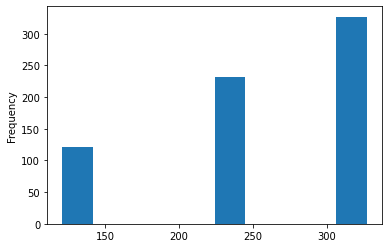

In [42]:
df[df["calculated_host_listings_count"] > 120]["calculated_host_listings_count"].plot.hist()

In [43]:
#show values over 300 in the calculated host listings count column
print(df[df["calculated_host_listings_count"] > 300]["calculated_host_listings_count"].head())

#amount of rows with calculated host listings count equal to 327
print(len(df[df["calculated_host_listings_count"] == 327]["calculated_host_listings_count"]))

38293    327
38294    327
38588    327
39769    327
39770    327
Name: calculated_host_listings_count, dtype: int64
327


I have observed that the suspected outliers - data points with over 300 calculated host listings - have the same value - 327 (which from description of the data means that this host owns 327 rentals listed on the platform). Looking further into the data, I can also observe that the amount of data points with 327 host listings is also 327, which actually aligns and I will not remove this data as I consider it valid and not necessarily to be understood as an outlier.

<AxesSubplot:xlabel='availability_365', ylabel='Count'>

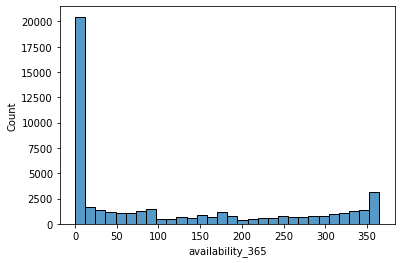

In [44]:
sns.histplot(data=df["availability_365"])

Based on the distribution of the values, I do not suspect this feature to actually have outliers that would not be acceptable, thus I have decided to not remove anything.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48736 entries, 0 to 48894
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48736 non-null  int64  
 1   name                            48721 non-null  object 
 2   host_id                         48736 non-null  int64  
 3   host_name                       48715 non-null  object 
 4   neighbourhood_group             48736 non-null  object 
 5   neighbourhood                   48736 non-null  object 
 6   latitude                        48736 non-null  float64
 7   longitude                       48736 non-null  float64
 8   room_type                       48736 non-null  object 
 9   price                           48736 non-null  int64  
 10  minimum_nights                  48736 non-null  int64  
 11  number_of_reviews               48736 non-null  int64  
 12  last_review                     

In this section, I have pre-processed all data I plan to use throughout my analysis. By handling missing data and removing outliers, I have ended up with 48736 data points compared to 48895 data points on import.

## Analysis

In this section, I will utilize the RandomForestClassifier object provided by sci-kit learn library to validate my hypothesis. I will create a function that splits my data into a training and testing set. I also set the random state to be equal to 0 to keep my models reproducible.

I have also created a function that will print out precision, recall, f1-score and the feature importances to quickly build models.

In [45]:
def split_data(dataframe, predictors, target, test_size=0.1):
    # Fill in the function here
    X = dataframe[predictors]
    y = dataframe[target]
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,
        test_size=test_size, random_state=np.random.RandomState(0))
    return X_train, X_test, y_train, y_test

def random_forest_classification(dataframe, x, Y):
    rng = np.random.RandomState(0)
    input_features = x
    X_train, X_test, y_train, y_test = split_data(dataframe, input_features, Y)
    model = sklearn.ensemble.RandomForestClassifier(random_state=rng)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    feature_importances = "\n\t".join(f"{feature}: {importance:.2f}" for feature, importance in zip(input_features, model.feature_importances_))
    print(f"Feature importances:\n\t{feature_importances}\n")
    print(sklearn.metrics.classification_report(y_test, preds))
       

I will start by looking at feature importances in a model where I only used room category (room_type) and boroughs (neighbourhood_group).

In [46]:
random_forest_classification(df.copy(), ["room_category", "boroughs"], "price_range")

Feature importances:
	room_category: 0.77
	boroughs: 0.23

              precision    recall  f1-score   support

           0       0.57      0.78      0.66      1133
           1       0.45      0.31      0.37      1214
           2       0.40      0.39      0.40      1175
           3       0.61      0.61      0.61      1352

    accuracy                           0.52      4874
   macro avg       0.51      0.52      0.51      4874
weighted avg       0.51      0.52      0.51      4874



## Evaluation

I can see that my hypothesis that room_category and boroughs can together predict the price_range to some reasonable extent (in this case, I have an f1-score of 50%). However, looking at the feature importance of room_category, it seems that room_type implies better the price range the rental is in compared to the neighbourghood_group.

This does not support my hypothesis that boroughs are a better predictor of price than room_category. However, these two can still potentially be the two best predictors in the dataset. To explore the possibility of a better predictor present in the dataset, I will additionally build models and observe variations in results from including a third variable in my model along with boroughs and room_category. In the case of a feature appearing with higher importance than room_category, it would become a better predictor of price, thus I would have to reformulate the hypothesis based on my findings.

## Revise hypothesis
Based on the revised hypothesis, which is that room_category is the best predictor of price followed by boroughs. I will further explore metrics of models built with data including remaining relevant numerical columns. 

In [47]:
random_forest_classification(df.copy(), ["minimum_nights", "room_category", "boroughs"], "price_range")

Feature importances:
	minimum_nights: 0.09
	room_category: 0.69
	boroughs: 0.22

              precision    recall  f1-score   support

           0       0.57      0.80      0.66      1133
           1       0.45      0.32      0.37      1214
           2       0.39      0.36      0.38      1175
           3       0.61      0.59      0.60      1352

    accuracy                           0.52      4874
   macro avg       0.50      0.52      0.50      4874
weighted avg       0.51      0.52      0.51      4874



In [48]:
 random_forest_classification(df.copy(), ["number_of_reviews", "room_category", "boroughs"], "price_range")

Feature importances:
	number_of_reviews: 0.22
	room_category: 0.60
	boroughs: 0.18

              precision    recall  f1-score   support

           0       0.57      0.76      0.65      1133
           1       0.44      0.33      0.38      1214
           2       0.43      0.31      0.36      1175
           3       0.58      0.68      0.62      1352

    accuracy                           0.52      4874
   macro avg       0.50      0.52      0.50      4874
weighted avg       0.50      0.52      0.50      4874



In [49]:
 random_forest_classification(df.copy(), ["reviews_per_month", "room_category", "boroughs"], "price_range")

Feature importances:
	reviews_per_month: 0.38
	room_category: 0.47
	boroughs: 0.15

              precision    recall  f1-score   support

           0       0.54      0.71      0.62      1133
           1       0.40      0.30      0.34      1214
           2       0.39      0.29      0.33      1175
           3       0.56      0.67      0.61      1352

    accuracy                           0.50      4874
   macro avg       0.47      0.49      0.48      4874
weighted avg       0.48      0.50      0.48      4874



In [50]:
 random_forest_classification(df.copy(), ["calculated_host_listings_count", "room_category", "boroughs"], "price_range")

Feature importances:
	calculated_host_listings_count: 0.15
	room_category: 0.66
	boroughs: 0.20

              precision    recall  f1-score   support

           0       0.57      0.79      0.66      1133
           1       0.43      0.34      0.38      1214
           2       0.41      0.34      0.37      1175
           3       0.61      0.63      0.62      1352

    accuracy                           0.52      4874
   macro avg       0.51      0.52      0.51      4874
weighted avg       0.51      0.52      0.51      4874



In [51]:
 random_forest_classification(df.copy(), ["availability_365", "room_category", "boroughs"], "price_range")

Feature importances:
	availability_365: 0.32
	room_category: 0.52
	boroughs: 0.17

              precision    recall  f1-score   support

           0       0.55      0.68      0.61      1133
           1       0.38      0.32      0.35      1214
           2       0.38      0.29      0.33      1175
           3       0.57      0.66      0.62      1352

    accuracy                           0.49      4874
   macro avg       0.47      0.49      0.47      4874
weighted avg       0.47      0.49      0.48      4874



## Discussion

After observing the results from my models, I have noticed several points:

### **1) Boroughs (or neighbourhood_group) is more than 3 times less important than room_category (or room_type)**

This does not support my hypothesis that neighbourhood is the best predictor of price range of rentals in New York. However, the room_type I have thought as the second best predictor is actually the most important feature throughout my models. Additionally my analysis has pointed me in further direction, which is explained in the following point.

### **2) reviews_per_month and availability_365 had a high feature importance**

Contrary to my expectations, reviews_per_month turned out to be of high importance (0.38) relative to the boroughs (0.15) and room_category (0.47) features. 

Based on my assumptions, the amount of reviews_per_month can be correlated both with demand and customer satisfaction, which has an effect on the price.

Additionally, the amount of days this rental is available in a year seemed to have a high importance as well (0.32) relative to room_category (0.52) and boroughs (0.17).

It is hard to discuss the possible causation for this high feature significance, but one possible hypothesis could for example be that low availability means higher exclusivity which could then drive the price of these rentals.

### **3) Accuracy metrics do not really change**

Adding into account all possible third variables, all models have resulted with an f1-score of around 0.5+-0.02. This means that taking into account more variables included in this dataset does not necessarily help the model to predict the price range better.

### **Further visualization**
After some reflecting around my visualization of price plotted on geographic map of New York, where it was obvious the most "yellow" (expensive) data points were in the Manhattan borough.

Perhaps I can explore the visualization a little bit more by visualizing only certain subsets of the dataset. I will start by visualizing the data from subset split according to boroughs in New York and followed by price visualizations of individual room categories.


In [52]:
#display the unique values within these categories
print(df["boroughs"].unique())
print(df["room_category"].unique())

[0 1 2 3 4]
[0 1 2]


In [53]:
#splitDataset into subsets according to boroughs:
boroughSubsetZero = df[df["boroughs"] == 0]
boroughSubsetOne = df[df["boroughs"] == 1]
boroughSubsetTwo = df[df["boroughs"] == 2]
boroughSubsetThree = df[df["boroughs"] == 3]
boroughSubsetFour = df[df["boroughs"] == 4]

#split dataset into subsets according to room categories:
roomCategoryZero = df[df["room_category"] == 0]
roomCategoryOne = df[df["room_category"] == 1]
roomCategoryTwo = df[df["room_category"] == 2]


In [54]:
#function to draw out the visualization of the subset:

def showPricePlotOnMap(dataframe, form):
  #take a dataframe and the subset value and create a geographical plot of data
  fig, ax = plt.subplots(figsize = (8,7))
  ax.scatter(dataframe.longitude, dataframe.latitude, zorder=1, alpha= 0.5, c=dataframe.price_range,cmap=plt.cm.plasma)
  ax.set_title('Subset of the dataset: {}'.format(form))
  ax.set_xlim(BBox[0],BBox[1])
  ax.set_ylim(BBox[2],BBox[3])
  ax.imshow(newYork, zorder=0, extent = BBox, aspect= 'equal')

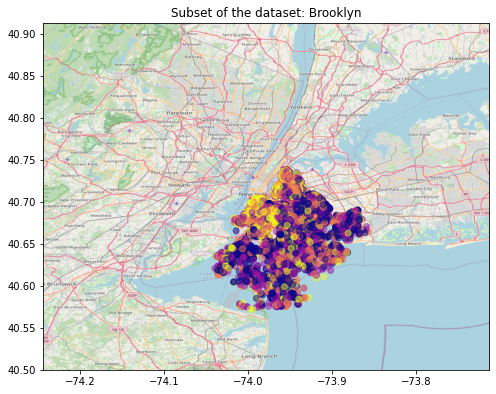

In [55]:
showPricePlotOnMap(boroughSubsetZero, list(neighbourhoodDict.keys())[list(neighbourhoodDict.values()).index(0)])

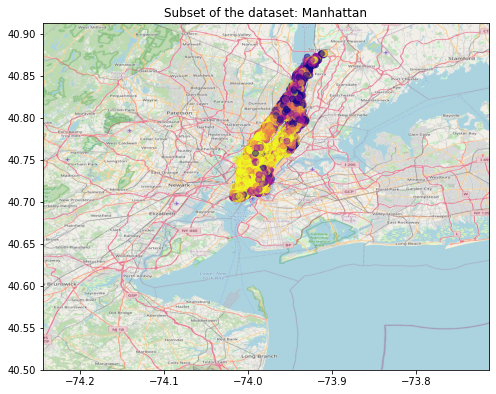

In [56]:
showPricePlotOnMap(boroughSubsetOne, list(neighbourhoodDict.keys())[list(neighbourhoodDict.values()).index(1)])

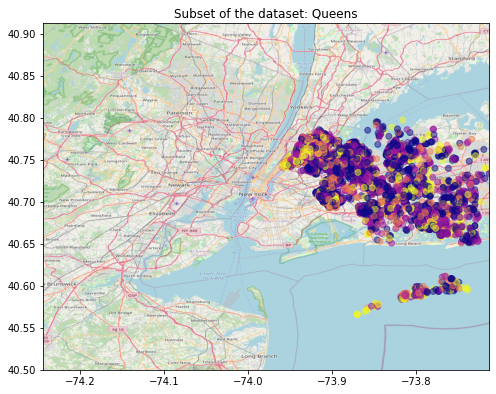

In [57]:
showPricePlotOnMap(boroughSubsetTwo, list(neighbourhoodDict.keys())[list(neighbourhoodDict.values()).index(2)])

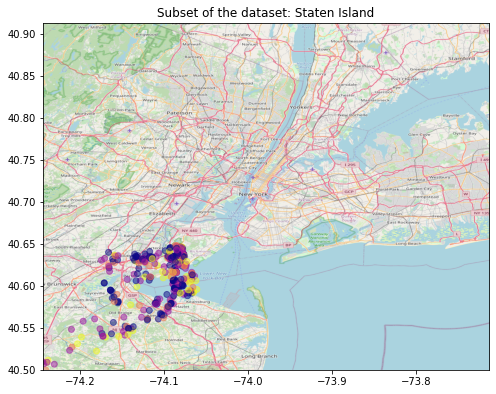

In [58]:
showPricePlotOnMap(boroughSubsetThree, list(neighbourhoodDict.keys())[list(neighbourhoodDict.values()).index(3)])

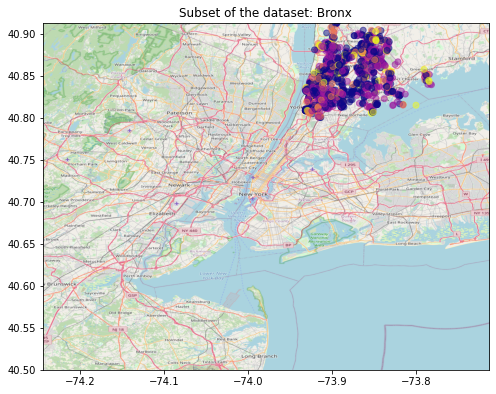

In [59]:
showPricePlotOnMap(boroughSubsetFour, list(neighbourhoodDict.keys())[list(neighbourhoodDict.values()).index(4)])

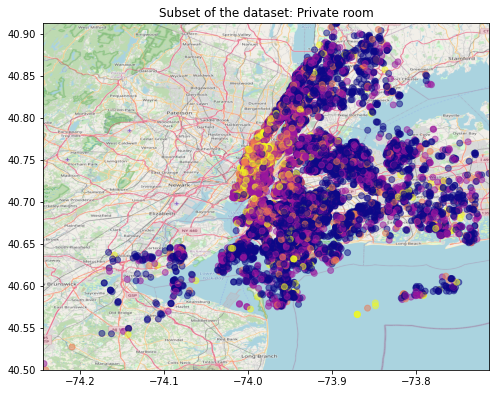

In [60]:
showPricePlotOnMap(roomCategoryZero, list(roomtypeDict.keys())[list(roomtypeDict.values()).index(0)])

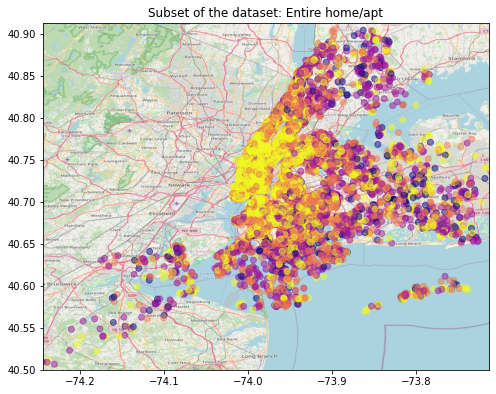

In [61]:
showPricePlotOnMap(roomCategoryOne, list(roomtypeDict.keys())[list(roomtypeDict.values()).index(1)])

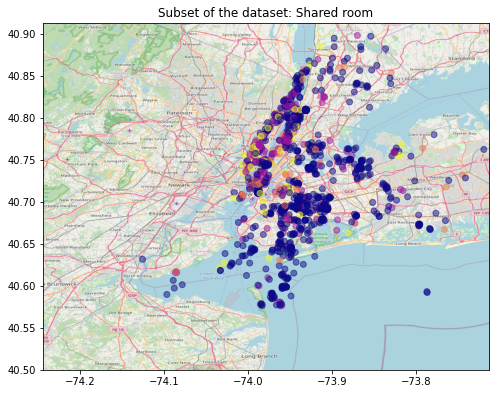

In [62]:
showPricePlotOnMap(roomCategoryTwo, list(roomtypeDict.keys())[list(roomtypeDict.values()).index(2)])

Looking at the first five plots, representing subsets of individual boroughs, I can observe that it would be harder to determine the price even in these subsets as there are still expensive rentals in all of the 5 New York boroughs. 

Comparing the last three plots created from subsets according to room type, it becomes obvious that Entire home/apt as room_type is significantly more expensive and visually it is a more distinct separation of blue (cheap) and yellow (expensive).

Therefore I can see how my revising the hypothesis in the Evaluation section (room_type is better predictor than neighbourhood_group) made sense in connection to my observation 1) mentioned above.

My analysis has also implies that reviews_per_month and availability_365 are a better predictor of price than neighbourhood_group.

##Conclusion

I have started this paper by exploring the data and building a hypothesis, that I could potentially answer using the presented material in the Data Intelligence course.

After getting a grasp of data and based on my assumptions, I have built the following hypothesis:
"the neighbourhood_group is the best predictor for price followed by the room type".

To conduct my hypothesis, I have preprocessed my data in order to fit it into a RandomForestClassifier object, which included handling missing values or removing outliers.

For visualization of the data, I have used the geographical coordinates included in the latitude and longitude columns with combination of the price to plot individual datarows on a map. This allowed me to get a good grasp on the data initially and it further supported my initial hypothesis.

After conducting my analysis, I have observed that room_category had a higher feature importance than boroughs, which then helped me revise my hypothesis to room_type being the best predictor of the price.

Furthermore, I have explored the importance of other relevant features from the dataset. During the exploration, I have found out that availability throughout the year and reviews per month are actually even better predictors of price than boroughs.

This has completely reframed my understanding that the price is heavily dependent on the type of the rental, e.g. renting a entire home or apartment is likely to be expensive no matter the New York borough. Using subsets to plot the individual data points also proved to be a good tool to see variances later in my discussion. This data analysis implies that type of the rental (room_type) is the best predictor of price of short-term rentals in New York, followed by the amount of reviews per month and availability during the year.


## Limitations
The biggest limitation I see for this data analysis is my limited knowledge of models. Within the course of Data Intelligence, we have been introduced to interpreting metrics and building two models - Linear Regression and Random Forest. 

As I have used categorical data in my hypothesis, I had to choose a Random Forest since they do not make sense in a Linear regression with basic label encoding. Having to use a Random Forest, I had to make my predicted value a categorical number as well (price to price-range), where I have inductively created price-ranges to split the dataset in nearly equal parts. This split was done based on my intuition and not best practices in such specific situations (as I am unfamiliar with them since they are not covered in the course).


I believe a better model could be found (perhaps a Logistic Regression?) that would achieve higher accuracy and thus the relevant metrics would tell us a more accurate answer about the relationship of the variables.

Another limitation is definitely the lack of information about the dataset; e.g. how was it collected? Was it scraped or was it exported from an internal database? The context would potentially allow me to get a better interpretation of the dataset.

## References

Provost, Foster & T. Fawcett (2013) Data Science for Business, O'Reilly Media


R. Grant (2019) Data Visualization, CRC Press